# **AI_Generated VS Real Image Classifier**

## Basic Setup

In [304]:
# Importing all necessary libraries

import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np
import warnings

warnings.filterwarnings('ignore')

In [305]:
# # Checking for gpus

# gpus = tf.config.experimental.list_physical_devices('GPU')
# for gpu in gpus: 
#     tf.config.experimental.set_memory_growth(gpu, True)

# print(gpus)

In [306]:
# pip install opencv-python

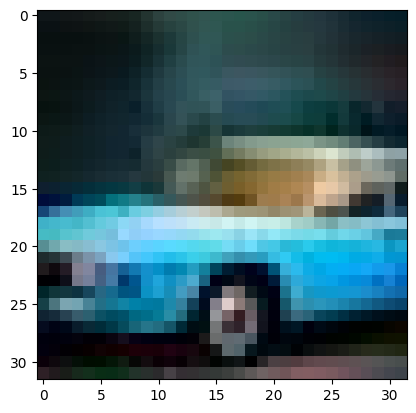

In [307]:
# reading a single image

img = cv2.imread(os.path.join('data', 'FAKE', '1001 (2).jpg'))
plt.imshow(img)

## Loading dataset

In [308]:
# loaded dataset from given directory and created an data object having batch size of 32

data = tf.keras.utils.image_dataset_from_directory('DATA', image_size=(32, 32))

Found 20020 files belonging to 2 classes.


In [309]:
# Access and print the class names

class_names = data.class_names
print("Class Names:", class_names)

# Print the assigned labels
for i, class_name in enumerate(class_names):
    print(f"Class {i}: {class_name}")

Class Names: ['Fake', 'Real']
Class 0: Fake
Class 1: Real


In [28]:
# Created an iterable numpy array of dataset

data_it = data.as_numpy_iterator()

In [29]:
# checking for a single element of data_it object
# batch variable contains a batch of 32 images 
# it is basically a tuple with numpy arrays of 32 images as first element and their labels as second element

batch = data_it.next()
print(batch[0].shape)
print(batch)

(32, 32, 32, 3)
(array([[[[ 19.,  15.,   6.],
         [ 19.,  15.,   6.],
         [ 21.,  17.,   6.],
         ...,
         [  0.,   4.,   5.],
         [  0.,   3.,   6.],
         [  0.,   1.,   5.]],

        [[ 15.,  11.,   2.],
         [ 16.,  12.,   3.],
         [ 18.,  14.,   5.],
         ...,
         [  6.,   6.,   6.],
         [  3.,   4.,   6.],
         [  0.,   3.,   6.]],

        [[  9.,   6.,   0.],
         [ 11.,   8.,   1.],
         [ 14.,  11.,   4.],
         ...,
         [ 12.,   8.,   5.],
         [  7.,   6.,   4.],
         [  4.,   3.,   1.]],

        ...,

        [[  1.,   0.,   0.],
         [  1.,   0.,   0.],
         [  3.,   2.,   0.],
         ...,
         [  0.,   1.,   2.],
         [  2.,   4.,   3.],
         [  0.,   0.,   0.]],

        [[  2.,   1.,   0.],
         [  7.,   6.,   1.],
         [  4.,   3.,   0.],
         ...,
         [ 46.,  50.,  51.],
         [ 54.,  56.,  55.],
         [ 48.,  48.,  46.]],

        [[  1.,   0

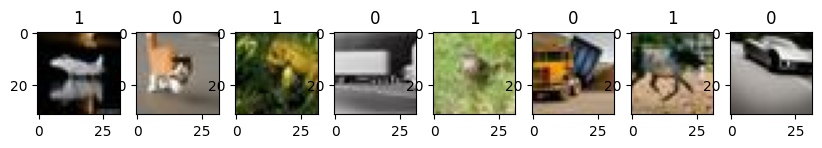

In [30]:
# Plotting eight images from batch

fig, ax = plt.subplots(ncols=8, figsize=(10, 10))
for idx, img in enumerate(batch[0][:8]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

## Data Preprocessing

In [31]:
# checking for scales of pixels

print(batch[0].min())
print(batch[0].max())

0.0
255.0


In [32]:
# scalling all pixels values between 0 and 1 and applying it on whole dataset

data = data.map(lambda x, y : (x/255, y))

In [33]:
# again creating an iterable numpy array of scaled dataset

scaled_it = data.as_numpy_iterator()

In [34]:
# creating fractions for splitting dataset into train, test and validation

train_size = int(len(data)*0.7)
cv_size = int(len(data)*0.2)
test_size = int(len(data)*0.1)+1

In [35]:
# checking if fraction size is valid or not 

train_size+cv_size+test_size == len(data)

True

In [36]:
# creating train, test and validatio dataset

train = data.take(train_size)
cv = data.skip(train_size).take(cv_size)
test = data.skip(train_size+cv_size).take(test_size)

In [37]:
# function for data augmantations

def augmant_data(x,y):
    x = tf.image.random_flip_left_right(x)
    x = tf.image.random_flip_up_down(x)
    x = tf.image.random_brightness(x, max_delta=0.1)
    x = tf.image.random_contrast(x, lower=0.9, upper=1.1)

    return x,y

In [38]:
# applying data augmantations

train_augmanted_data = train.map(augmant_data)

In [72]:
# for batch in train_augmanted_data:
#     print(batch)
#     break

## Model Building

In [129]:
# importing necessary libraries for model building 

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, BatchNormalization, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy
from tensorflow.keras.models import load_model
from tensorflow.keras.regularizers import l1

In [270]:
# building my own CNN architecture

model = Sequential()

model.add(Conv2D(16, (3,3), 1, activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

model.add(Conv2D(64, (2,2), 1, activation='relu', padding='same'))
model.add(MaxPooling2D())

# model.add(Conv2D(64, (2,2), 1, activation='relu', padding='same'))
# model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu', kernel_regularizer=l1(0.001)))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


In [271]:
# model summary

model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 max_pooling2d_40 (MaxPooli  (None, 16, 16, 16)        0         
 ng2D)                                                           
                                                                 
 conv2d_41 (Conv2D)          (None, 16, 16, 32)        4640      
                                                                 
 max_pooling2d_41 (MaxPooli  (None, 8, 8, 32)          0         
 ng2D)                                                           
                                                                 
 conv2d_42 (Conv2D)          (None, 8, 8, 64)          8256      
                                                                 
 max_pooling2d_42 (MaxPooli  (None, 4, 4, 64)        

In [272]:
# from tensorflow.keras.applications import ResNet50

# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

# model = Sequential() 
# model.add(base_model)
# model.add(Flatten())

# model.add(Flatten())
# model.add(Dense(256, activation='relu'))
# model.add(BatchNormalization())
# model.add(Dropout(0.5))
# model.add(Dense(128, activation='relu'))
# model.add(Dense(1, activation='sigmoid'))


In [273]:
# model.summary()

In [274]:
# logdir = 'logs'

In [275]:
# tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [276]:
# from tensorflow.keras.callbacks import LearningRateScheduler, EarlyStopping
# from tensorflow.keras.optimizers import Adam

# initial_learning_rate = 0.001

# def lr_scheduler(epochs, lr):
#     return lr*0.95

# lr_schedule = LearningRateScheduler(lr_scheduler)
# optimizer = Adam(learning_rate=initial_learning_rate)
# early_stoping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

In [277]:
# compiling model

model.compile(optimizer=Adam(), loss = BinaryCrossentropy(), metrics=['accuracy', Precision(), Recall()])

In [278]:
# training model and saving logs in hist

hist = model.fit(train_augmanted_data, epochs=20, validation_data=cv)

Epoch 1/20
438/438 [==============================] - 16s 28ms/step - loss: 2.1593 - accuracy: 0.7862 - precision_11: 0.7775 - recall_11: 0.8034 - val_loss: 0.8155 - val_accuracy: 0.6730 - val_precision_11: 0.6075 - val_recall_11: 0.9871
Epoch 2/20
438/438 [==============================] - 12s 28ms/step - loss: 0.5315 - accuracy: 0.8505 - precision_11: 0.8492 - recall_11: 0.8529 - val_loss: 0.5328 - val_accuracy: 0.8175 - val_precision_11: 0.9617 - val_recall_11: 0.6630
Epoch 3/20
438/438 [==============================] - 12s 27ms/step - loss: 0.4450 - accuracy: 0.8674 - precision_11: 0.8681 - recall_11: 0.8669 - val_loss: 1.8614 - val_accuracy: 0.5790 - val_precision_11: 0.5420 - val_recall_11: 0.9995
Epoch 4/20
438/438 [==============================] - 12s 28ms/step - loss: 0.3996 - accuracy: 0.8749 - precision_11: 0.8790 - recall_11: 0.8698 - val_loss: 0.4587 - val_accuracy: 0.8350 - val_precision_11: 0.7753 - val_recall_11: 0.9475
Epoch 5/20
438/438 [============================

## Model Evaluation

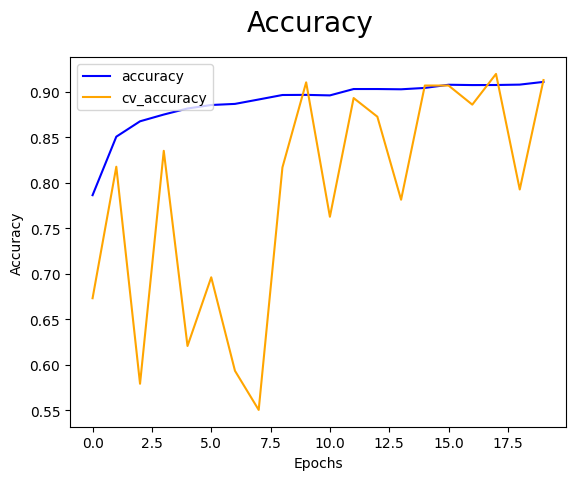

In [279]:
# Plotting accuracy of model

fig = plt.figure()
plt.plot(hist.history['accuracy'], color='blue', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='cv_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.xlabel('Epochs')
plt.ylabel("Accuracy")
plt.show()

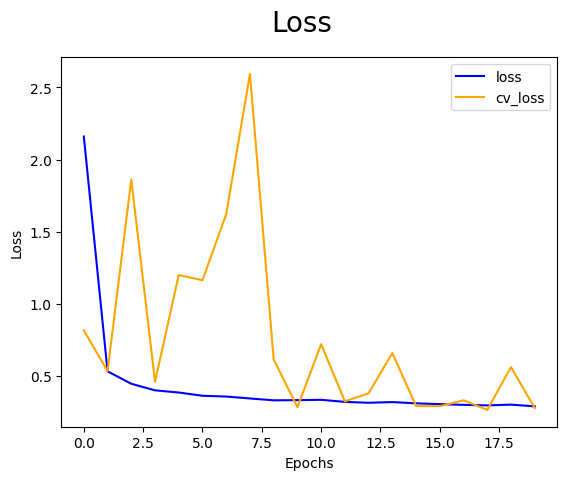

In [280]:
# plotting loss of model

fig = plt.figure()
plt.plot(hist.history['loss'], color='blue', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='cv_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper right")
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [281]:
# Evaluating model on testing data

pre = Precision()
rec = Recall()
acc = BinaryAccuracy()

In [282]:
# Making predictions on testing data

y_probs = []
y_preds = []
y_true = []

for batch in test.as_numpy_iterator(): 
    X, y = batch
    y_prob = model.predict(X)
    y_hat = tf.cast(y_prob >= 0.5, dtype=tf.int32)
    y_true.extend(y)
    y_probs.extend(y_prob)
    y_preds.extend(y_hat)

    pre.update_state(y, y_hat)
    rec.update_state(y, y_hat)
    acc.update_state(y, y_hat)


1/1 [==============================] - 0s 374ms/step


In [283]:
# Printing precision, recall and accuracy

print(f'Precision: {pre.result().numpy()}, Recall: {rec.result().numpy()}, Accuracy: {acc.result().numpy()}')

Precision: 0.9008746147155762, Recall: 0.9382591247558594, Accuracy: 0.9186626672744751


Optimal Threshold: 0.6334794759750366


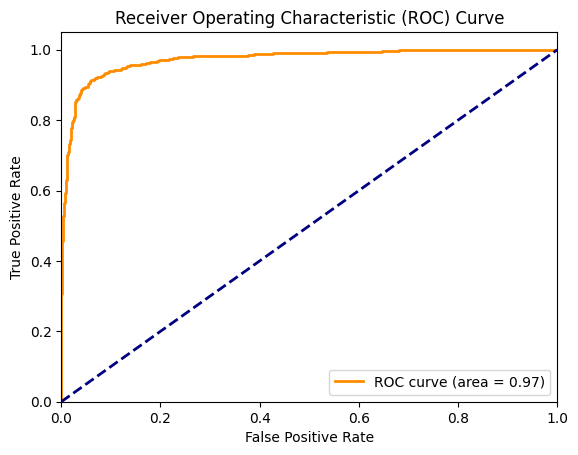

In [284]:
# plotting auc, roc curve
from sklearn.metrics import roc_curve, auc

# Calculate the false positive rate and true positive rate
fpr, tpr, thresholds = roc_curve(y_true, y_probs)

# Calculate the AUC
roc_auc = auc(fpr, tpr)

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold = thresholds[optimal_idx]

print(f'Optimal Threshold: {optimal_threshold}')

# Plot the ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Line representing random guessing
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

In [285]:
# # saving trained model

# model.save(os.path.join('model','ai_imageclassifier'), save_format='tf')

In [286]:
# # Loading saved model

# model = load_model(os.path.join('model','ai_imageclassifier'))

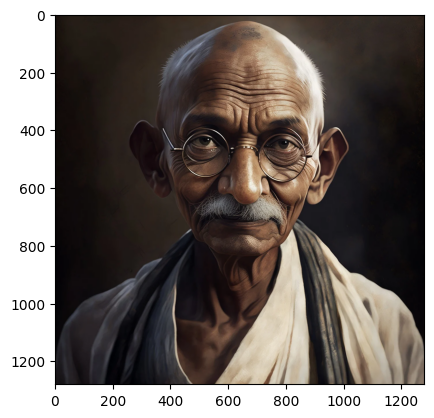

In [298]:
# making prediction on a single image which is a real image

img = cv2.imread('img/test_ai_img.webp')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.show()

In [299]:
# resizing test image

resize = tf.image.resize(img, (32, 32))

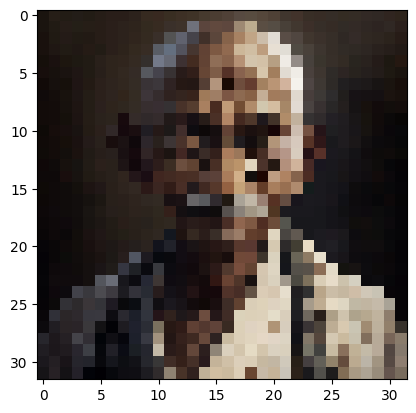

In [300]:
# image after resizing

plt.imshow(resize/255)

In [301]:
y_pred = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 29ms/step


In [302]:
y_pred

array([[0.02136214]], dtype=float32)

In [303]:
if y_pred >= 0.5: 
    print(f'Predicted class: REAL')
else:
    print(f'Predicted class: AI')

Predicted class: AI
